In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

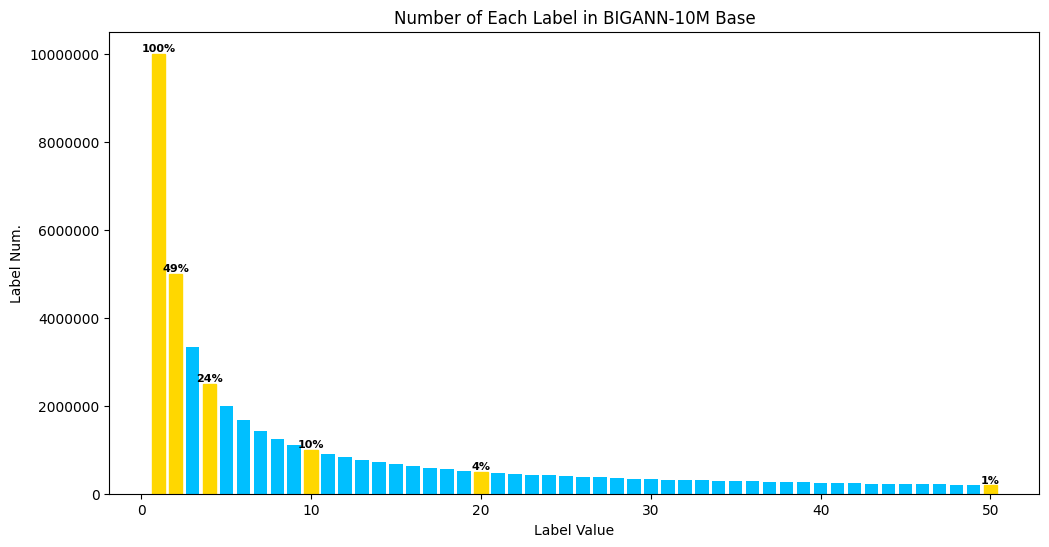

In [21]:
bigann = {
    1: 10000000, 2: 4999385, 3: 3333334, 4: 2498426, 5: 2000000,
    6: 1666667, 7: 1427348, 8: 1250000, 9: 1109807, 10: 1000000,
    11: 908303, 12: 833030, 13: 769231, 14: 714006, 15: 666667,
    16: 624333, 17: 588051, 18: 554592, 19: 526316, 20: 499407,
    21: 476173, 22: 454546, 23: 434555, 24: 416667, 25: 399956,
    26: 384616, 27: 370105, 28: 356400, 29: 344828, 30: 332483,
    31: 322552, 32: 311736, 33: 303031, 34: 293976, 35: 285681,
    36: 277778, 37: 270136, 38: 263158, 39: 256411, 40: 250000,
    41: 243595, 42: 238077, 43: 231337, 44: 226781, 45: 222223,
    46: 217344, 47: 212670, 48: 208091, 49: 204082, 50: 199854
}

percentile = [100, 50, 25, 10, 5, 1]
# colors = ["deepskyblue", "mediumseagreen", "fuchsia", "lightcoral", "darkorange", "red"]
sorted_bigann = dict(sorted(bigann.items(), key=lambda item: item[1]))
keys = list(sorted_bigann.keys())
values = list(sorted_bigann.values())
max_value = max(values)
highlights = [max_value * (p / 100) for p in percentile]
choices = [np.argmin([abs(v - hv) for v in values]) for hv in highlights]

# plot bigann histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(keys, values, color="deepskyblue")

used = defaultdict(int)

for i, idx in enumerate(choices):
    if idx in used:
        if used[idx] <= abs(percentile[i] - bigann[50 - idx] / max_value * 100):
            continue
    used[idx] = abs(percentile[i] - bigann[50 - idx] / max_value * 100)
    bars[idx].set_color("gold")
    plt.text(bars[idx].get_x() + bars[idx].get_width() / 2, bars[idx].get_height(), f"{int(bigann[50 - idx] / max_value * 100)}%", ha="center", va="bottom", fontsize=8, fontweight="bold")

plt.xlabel("Label Value")
plt.ylabel("Label Num.")
plt.title("Number of Each Label in BIGANN-10M Base")
plt.ticklabel_format(style="plain", axis='y')
plt.show()

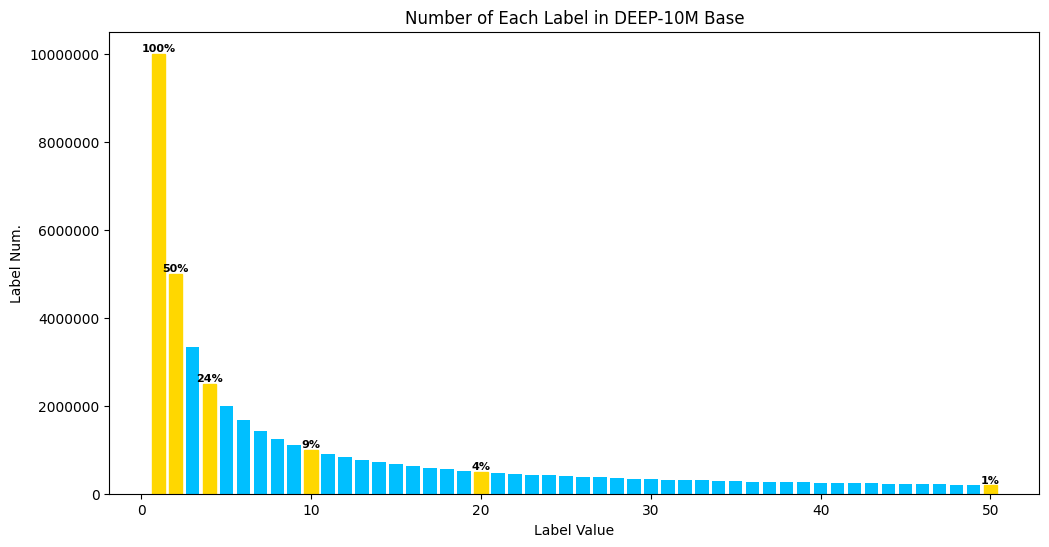

In [22]:
deep = {
    1: 10000000, 2: 5000000, 3: 3332065, 4: 2499160, 5: 2000000,
    6: 1664608, 7: 1428572, 8: 1250000, 9: 1111112, 10: 999282,
    11: 909091, 12: 831808, 13: 769231, 14: 712894, 15: 666148,
    16: 624455, 17: 588236, 18: 555556, 19: 526126, 20: 498986,
    21: 476191, 22: 454050, 23: 434783, 24: 416584, 25: 400000,
    26: 384616, 27: 370193, 28: 357143, 29: 344722, 30: 333334,
    31: 322551, 32: 312466, 33: 303031, 34: 293733, 35: 285715,
    36: 277504, 37: 269942, 38: 262902, 39: 256411, 40: 249858,
    41: 243761, 42: 238096, 43: 232559, 44: 226322, 45: 222186,
    46: 217392, 47: 212358, 48: 208334, 49: 203231, 50: 199947
}

sorted_deep = dict(sorted(deep.items(), key=lambda item: item[1]))
keys = list(sorted_deep.keys())
values = list(sorted_deep.values())
max_value = max(values)
highlights = [max_value * (p / 100) for p in percentile]
choices = [np.argmin([abs(v - hv) for v in values]) for hv in highlights]

# plot deep histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(keys, values, color="deepskyblue")

used = defaultdict(int)

for i, idx in enumerate(choices):
    if idx in used:
        if used[idx] <= abs(percentile[i] - deep[50 - idx] / max_value * 100):
            continue
    used[idx] = abs(percentile[i] - deep[50 - idx] / max_value * 100)
    bars[idx].set_color("gold")
    plt.text(bars[idx].get_x() + bars[idx].get_width() / 2, bars[idx].get_height(), f"{int(deep[50 - idx] / max_value * 100)}%", ha="center", va="bottom", fontsize=8, fontweight="bold")

plt.xlabel("Label Value")
plt.ylabel("Label Num.")
plt.title("Number of Each Label in DEEP-10M Base")
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [7]:
import struct
from pathlib import Path
from collections import defaultdict

In [5]:
marco_dir = Path("/localdata/jsu068/marco")
marco_embed_dir = marco_dir / "embedding"
marco_query_dir = marco_dir / "query"

In [6]:
with open(marco_embed_dir / "marco.768D.100M.euclidean.fbin", "rb") as f:
    n = struct.unpack('I', f.read(4))[0]
    dim = struct.unpack('I', f.read(4))[0]

n, dim

(101070374, 768)

In [7]:
meta = np.fromfile(marco_embed_dir / "meta.bin", dtype=np.uint8)
metaidx = np.fromfile(marco_embed_dir / "metaidx.bin", dtype=np.int32)

meta.shape, metaidx.shape

((909486248,), (202140751,))

In [8]:
# s = defaultdict(int)

# for idx in list(metaidx)[2:]:
#     if idx == 0:
#         continue
#     idx -= 1
#     s[meta[idx]] += 1
    
# s

In [9]:
marco_embed = defaultdict(int)
cnt = 0

for idx in list(metaidx)[2:]:
    if idx == 0:
        continue
    cnt += 1
    if (cnt == 10000000):
        break
    idx -= 1
    marco_embed[meta[idx]] += 1
    
marco_embed

defaultdict(int,
            {52: 1000972,
             55: 999906,
             54: 1000192,
             50: 999734,
             51: 998424,
             57: 1000636,
             48: 1000182,
             53: 999711,
             49: 1000082,
             56: 1000160})

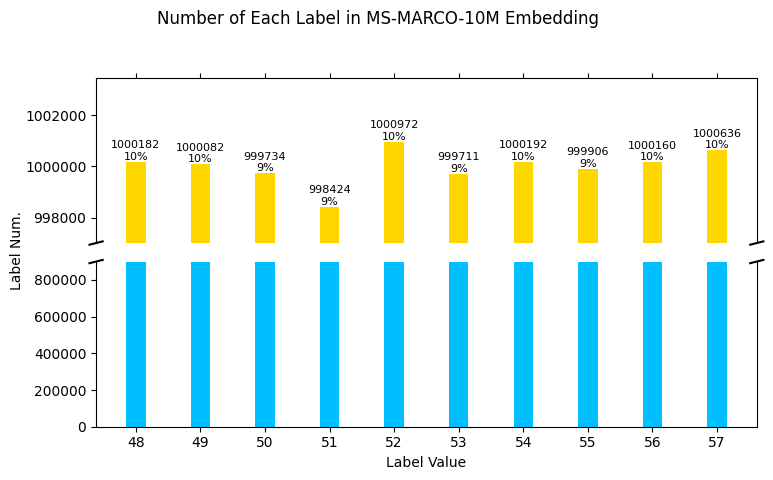

In [10]:
sorted_marco_embed = dict(sorted(marco_embed.items(), key=lambda item: item[1], reverse=True))
keys = list(sorted_marco_embed.keys())
values = list(sorted_marco_embed.values())

lower_limit = 0
upper_limit = 900000
cut_lower = 997000

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5))

bar_width = 0.3
bars_upper = ax1.bar(keys, values, color="gold", width=bar_width)
ax1.set_xticks(keys)
ax1.set_ylim(cut_lower, max(values) + 2500)  # Display the higher part
ax1.ticklabel_format(style="plain", axis='y')

bars_lower = ax2.bar(keys, values, color="deepskyblue", width=bar_width)
ax2.set_xticks(keys)
ax2.set_ylim(lower_limit, upper_limit)  # Display the lower part
ax2.ticklabel_format(style="plain", axis='y')

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# Add diagonal lines to indicate the broken y-axis
d = .01  # Proportion of the diagonal cut size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)  # Switch to the lower subplot
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

for bar in bars_upper:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}\n{int(height/sum(sorted_marco_embed.values())*100.)}%', ha='center', va='bottom', fontsize=8)

ax2.set_xlabel("Label Value")
fig.text(0.04, 0.5, 'Label Num.', va='center', rotation='vertical', fontsize=10)

fig.suptitle("Number of Each Label in MS-MARCO-10M Embedding", ha='center')
plt.tight_layout(rect=[0.04, 0.03, 1, 0.95])
plt.show()

In [11]:
with open(marco_query_dir / "marco.768D.10K.euclidean.fbin", "rb") as f:
    n = struct.unpack('I', f.read(4))[0]
    dim = struct.unpack('I', f.read(4))[0]

n, dim

(9376, 768)

In [12]:
meta = np.fromfile(marco_query_dir / "meta.bin", dtype=np.uint8)
metaidx = np.fromfile(marco_query_dir / "metaidx.bin", dtype=np.int32)

meta.shape, metaidx.shape

((36397,), (18755,))

In [13]:
marco_query = defaultdict(int)

for idx in list(metaidx)[2:]:
    if idx == 0:
        continue
    idx -= 1
    marco_query[meta[idx]] += 1
    
marco_query

defaultdict(int,
            {57: 938,
             49: 938,
             54: 937,
             55: 937,
             48: 938,
             56: 937,
             53: 937,
             51: 938,
             50: 938,
             52: 938})

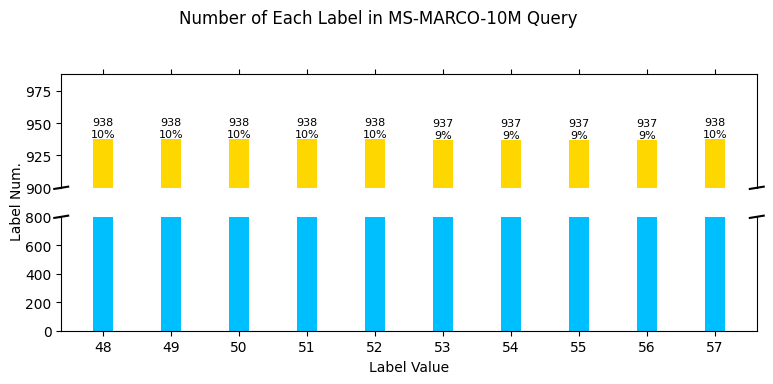

In [14]:
sorted_marco_query = dict(sorted(marco_query.items(), key=lambda item: item[1], reverse=True))
keys = list(sorted_marco_query.keys())
values = list(sorted_marco_query.values())

lower_limit = 0
upper_limit = 800
cut_lower = 900

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 4))

bar_width = 0.3
bars_upper = ax1.bar(keys, values, color="gold", width=bar_width)
ax1.set_xticks(keys)
ax1.set_ylim(cut_lower, max(values) + 50)  # Display the higher part
ax1.ticklabel_format(style="plain", axis='y')

bars_lower = ax2.bar(keys, values, color="deepskyblue", width=bar_width)
ax2.set_xticks(keys)
ax2.set_ylim(lower_limit, upper_limit)  # Display the lower part
ax2.ticklabel_format(style="plain", axis='y')

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# Add diagonal lines to indicate the broken y-axis
d = .01  # Proportion of the diagonal cut size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)  # Switch to the lower subplot
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

for bar in bars_upper:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}\n{int(height/sum(sorted_marco_query.values())*100.)}%', ha='center', va='bottom', fontsize=8)

ax2.set_xlabel("Label Value")
fig.text(0.04, 0.5, 'Label Num.', va='center', rotation='vertical', fontsize=10)

fig.suptitle("Number of Each Label in MS-MARCO-10M Query", ha='center')
plt.tight_layout(rect=[0.04, 0.03, 1, 0.95])
plt.show()

In [1]:
import struct
import numpy as np
# from mmap import mmap
import mmap
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt

yfcc_dir = Path("/localdata/jsu068/yfcc")
base_filter_dir = yfcc_dir / "yfcc.filter.base.bin"
query_filter_dir = yfcc_dir / "yfcc.filter.query.bin"

In [2]:
with open(base_filter_dir, "rb") as f:
    n = struct.unpack('I', f.read(4))[0]

labels = np.memmap(base_filter_dir, dtype=np.int32, mode='r')

n, labels.shape

(10000000, (118210477,))

In [3]:
# separator = np.iinfo(np.uint32).max - 1
separator = 0
yfcc_base_filters = defaultdict(int)

for label in labels:
    if label != separator:
        yfcc_base_filters[label] += 1

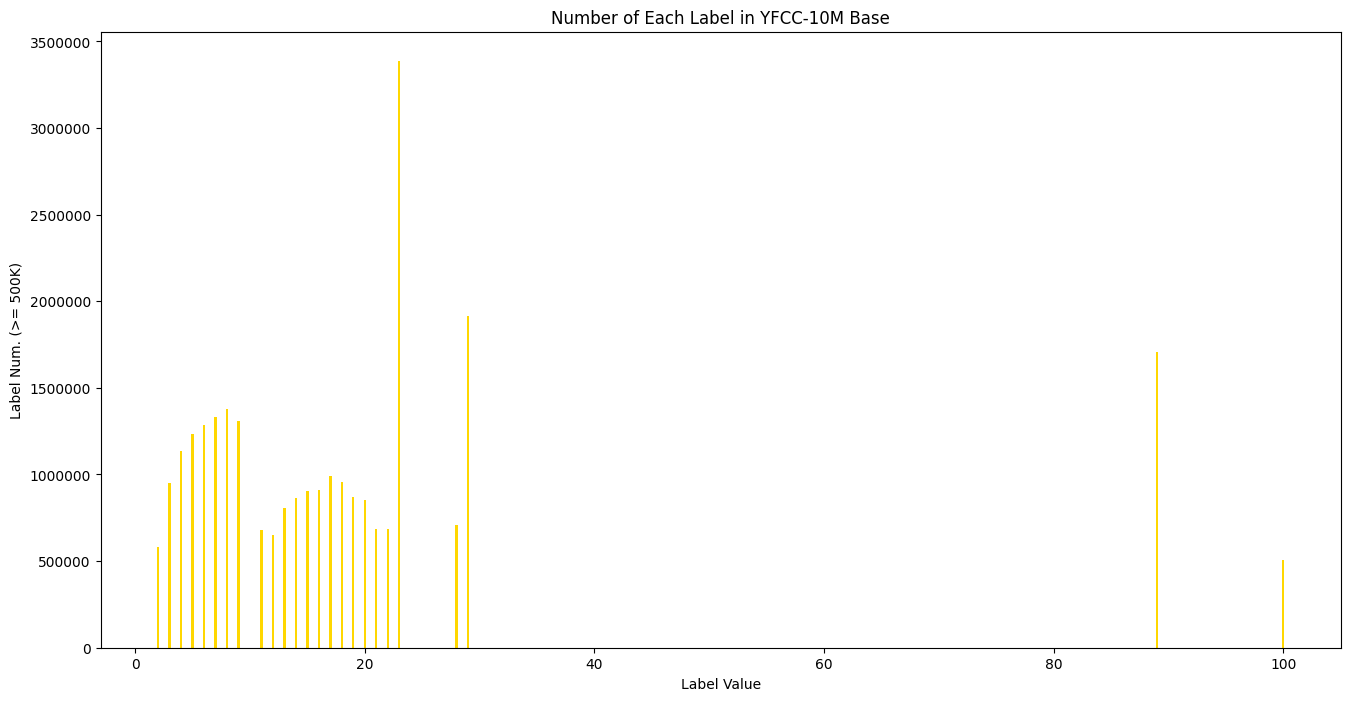

In [23]:
# sorted_yfcc_base_filters = dict(sorted(yfcc_base_filters.items(), key=lambda item: item[1], reverse=True))
sorted_yfcc_base_filters = {k: v for k, v in sorted(yfcc_base_filters.items(), key=lambda item: item[1], reverse=True) if v >= 500000}
keys = list(sorted_yfcc_base_filters.keys())
values = list(sorted_yfcc_base_filters.values())

plt.figure(figsize=(16, 8))
bars = plt.bar(keys, values, color="gold", width=0.2)

plt.xlabel("Label Value")
plt.ylabel("Label Num. (>= 500K)")
plt.title("Number of Each Label in YFCC-10M Base")
plt.ticklabel_format(style="plain", axis='x')
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [4]:
with open(query_filter_dir, "rb") as f:
    n = struct.unpack('I', f.read(4))[0]

labels = np.memmap(query_filter_dir, dtype=np.int32, mode='r')

n, labels.shape

(100000, (238375,))

In [5]:
# separator = np.iinfo(np.uint32).max - 1
separator = 0
yfcc_query_filters = defaultdict(int)

for label in labels:
    if label != separator:
        yfcc_query_filters[label] += 1

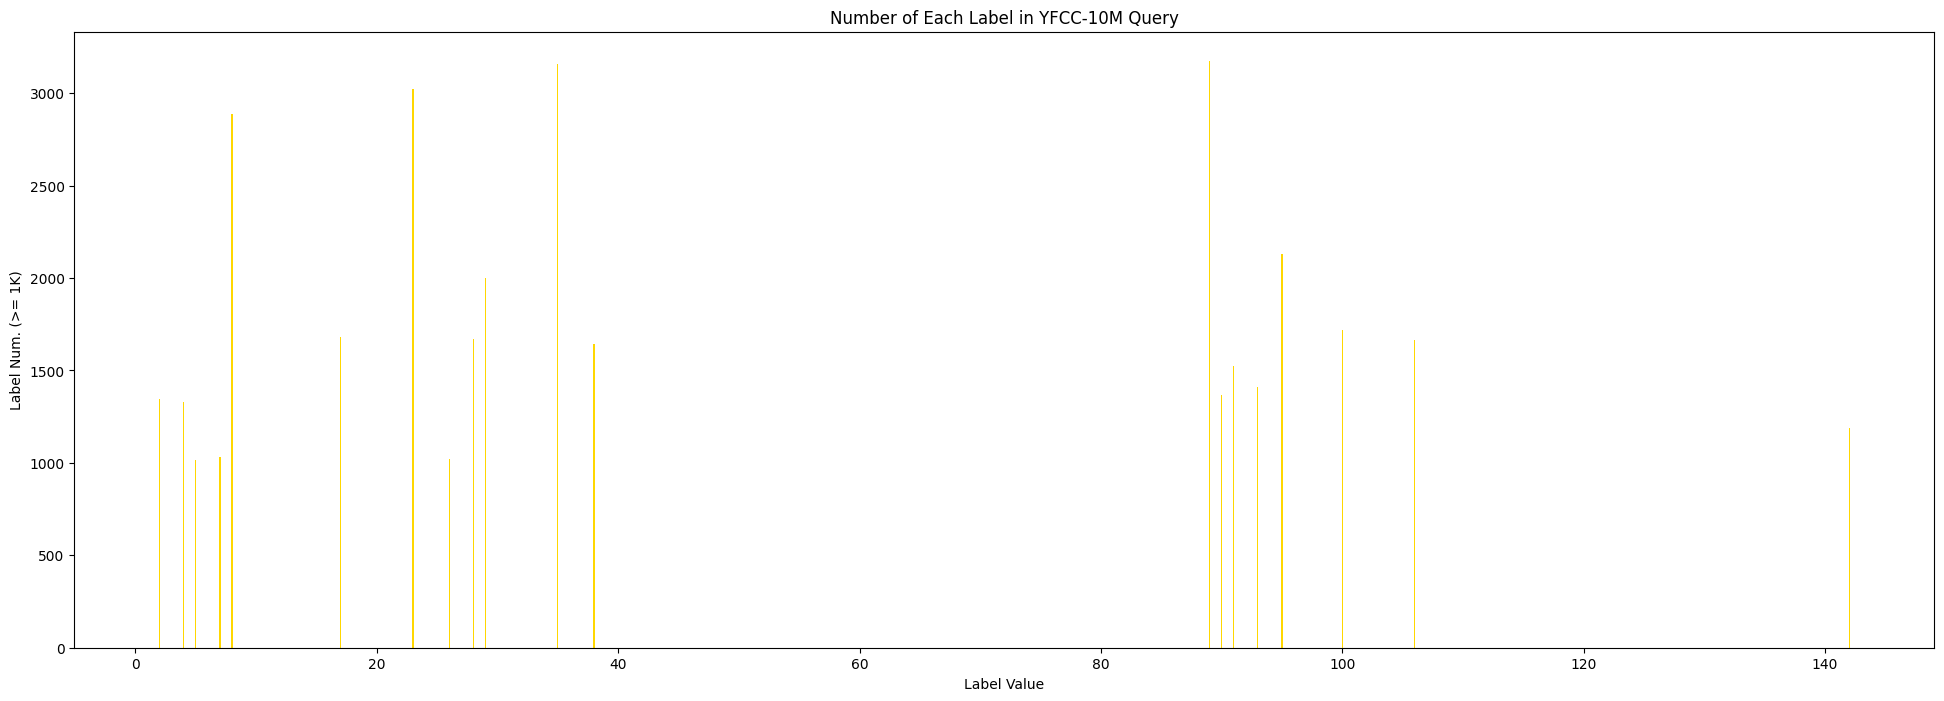

In [21]:
sorted_yfcc_query_filters = {k: v for k, v in sorted(yfcc_query_filters.items(), key=lambda item: item[1], reverse=True) if v >= 1000}
keys = list(sorted_yfcc_query_filters.keys())
values = list(sorted_yfcc_query_filters.values())

plt.figure(figsize=(24, 8))
bars = plt.bar(keys, values, color="gold", width=0.1)

plt.xlabel("Label Value")
plt.ylabel("Label Num. (>= 1K)")
plt.title("Number of Each Label in YFCC-10M Query")
plt.ticklabel_format(style="plain", axis='x')
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [22]:
percentile = [100, 75, 50, 25, 1]
sorted_yfcc_base = sorted(yfcc_base_filters.items(), key=lambda item: item[1], reverse=True)
max_value = sorted_yfcc_base[0][1]

highlights = [max_value * (p / 100) for p in percentile]
choices = [np.argmin([abs(v - hv) for k, v in sorted_yfcc_base if k in yfcc_query_filters]) for hv in highlights]

choices, [sorted_yfcc_base[i] for i in choices], [sorted_yfcc_base[i][1] / max_value for i in choices]

([0, 1, 2, 16, 235],
 [(23, 3386745), (29, 1915985), (89, 1707412), (20, 851688), (1589, 33896)],
 [1.0,
  0.5657305170598909,
  0.5041454257701716,
  0.2514768605253717,
  0.010008429923126777])